# EXPLORATORY DATA ANALYSIS (EDA) AND DATA MODELLING OF AIRBNB DATA NEWYORK CITY 2023

## Here, mostly we peform the following activities: (Using the Airbnb NYC 2023 data)
## 1. Data Scraping/Extracting/Loading
## 2. Data Cleaning
## 3. Data Wrangling
## 4. Data Exploration 
## 5. Data Visualization
## 6. Data Prediction

### Firstly,we  import libraries and modules used for analysis and visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings #ignores warning issued
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None) #sets maximum column display

### Loading Dataset

In [2]:
airbnb = pd.read_csv('airbnb_NYC_2023.csv')

### Getting to know our datasets

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


### Number of Rows and Number of Columns

In [4]:
airbnb.shape

(42931, 18)

In [5]:
print(f'number of rows : {airbnb.shape[0]}  \nnumber of columns : {airbnb.shape[1]}')

number of rows : 42931  
number of columns : 18


### Information about Dataset

In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42931 non-null  int64  
 1   name                            42919 non-null  object 
 2   host_id                         42931 non-null  int64  
 3   host_name                       42926 non-null  object 
 4   neighbourhood_group             42931 non-null  object 
 5   neighbourhood                   42931 non-null  object 
 6   latitude                        42931 non-null  float64
 7   longitude                       42931 non-null  float64
 8   room_type                       42931 non-null  object 
 9   price                           42931 non-null  int64  
 10  minimum_nights                  42931 non-null  int64  
 11  number_of_reviews               42931 non-null  int64  
 12  last_review                     

### Duplicates
When a dataset contains identical records, this is known as "duplication." Such duplications can arise from errors during data entry or data collection processes. Removing these duplicate entries is crucial as it helps to save time and resources by eliminating redundancy in the data.


In [7]:
value = len(airbnb[airbnb.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


## Missing values/null values
Real-world datasets frequently have many missing values, often caused by data corruption or other issues. Since numerous machine learning algorithms cannot process data with missing values, addressing these gaps during the preprocessing phase is crucial. Therefore, the initial step in managing missing data involves identifying where and how much data is missing.

### Counting null values

In [8]:
print(airbnb.isnull().sum())

id                                    0
name                                 12
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                 10304
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           42930
dtype: int64


### Visualizing null values

<Axes: >

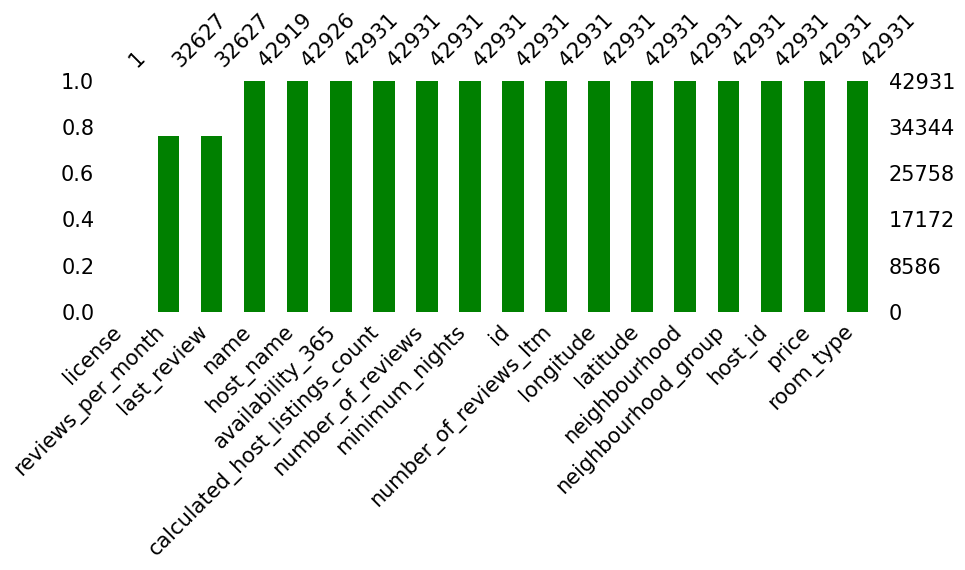

In [9]:
import missingno as msno
msno.bar(airbnb, color='green',sort='ascending', figsize=(10,3), fontsize=15)

### Visualizing null values using heatmap

<Axes: >

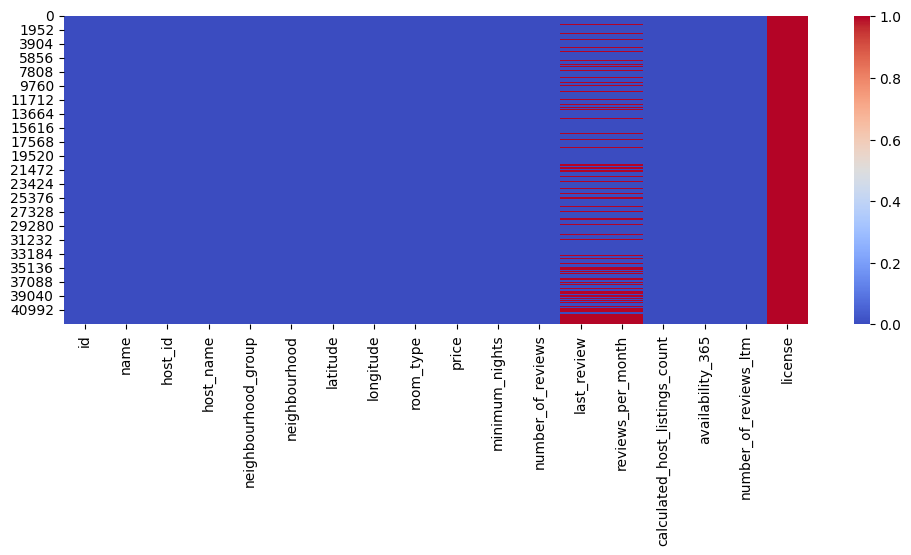

In [10]:
plt.figure(figsize=(12,4))
sns.heatmap(airbnb.isna(), cmap = 'coolwarm')

# KNOW YOUR VARIABLES 

### Columns

In [11]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

### Statistical summary

In [12]:
airbnb.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,42931.0,NaN,NaN,NaN,222277244526372224.0,334421302203795328.0,2595.0,19404736.0,43374815.0,630501597262169088.0,840466047136140160.0
name,42919,41408,Water View King Bed Hotel Room,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,42931.0,NaN,NaN,NaN,151601209.021919,162130107.567557,1678.0,16085328.0,74338125.0,268069240.5,503872891.0
host_name,42926,9831,Blueground,526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,42931,5,Manhattan,17658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,42931,223,Bedford-Stuyvesant,3086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,42931.0,NaN,NaN,NaN,40.728273,0.05764,40.500314,40.687485,40.72404,40.762293,40.91138
longitude,42931.0,NaN,NaN,NaN,-73.943665,0.056627,-74.251907,-73.98175,-73.95262,-73.924035,-73.71087
room_type,42931,4,Entire home/apt,24279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,42931.0,NaN,NaN,NaN,200.307167,895.082911,0.0,75.0,125.0,200.0,99000.0


### Variable description

### Unique Variables

In [13]:
airbnb.nunique()

id                                42931
name                              41408
host_id                           27455
host_name                          9831
neighbourhood_group                   5
neighbourhood                       223
latitude                          22673
longitude                         20130
room_type                             4
price                              1089
minimum_nights                      128
number_of_reviews                   476
last_review                        2795
reviews_per_month                   881
calculated_host_listings_count       65
availability_365                    366
number_of_reviews_ltm               168
license                               1
dtype: int64

In [14]:
for i in airbnb.columns.tolist():
  print("No. of unique values in ",i,"is",airbnb[i].nunique())

No. of unique values in  id is 42931
No. of unique values in  name is 41408
No. of unique values in  host_id is 27455
No. of unique values in  host_name is 9831
No. of unique values in  neighbourhood_group is 5
No. of unique values in  neighbourhood is 223
No. of unique values in  latitude is 22673
No. of unique values in  longitude is 20130
No. of unique values in  room_type is 4
No. of unique values in  price is 1089
No. of unique values in  minimum_nights is 128
No. of unique values in  number_of_reviews is 476
No. of unique values in  last_review is 2795
No. of unique values in  reviews_per_month is 881
No. of unique values in  calculated_host_listings_count is 65
No. of unique values in  availability_365 is 366
No. of unique values in  number_of_reviews_ltm is 168
No. of unique values in  license is 1


### Observations
We are concentrating on several key columns within our dataset: 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', and 'number_of_reviews', as these columns provide substantial and valuable information.

# EDA - EXLPORATORY DATA ANALYSIS
Exploratory Data Analysis (EDA) is a crucial phase in the data science workflow, centered on examining and comprehending the dataset. The main goal of EDA is to extract insights, identify patterns, and recognize relationships and trends within the data. This iterative process also aids in spotting outliers, detecting missing values, and identifying other potential issues that could affect subsequent data analysis and modeling


# WE ARE GOING TO VISUALIZE DATA COLUMNWISE

## A. COLUMN = name
### What are the most listed hotel name present in Airbnb Newyork in 2023?

Text(0.5, 1.0, 'Most listed Hotel Name present in Newyork')

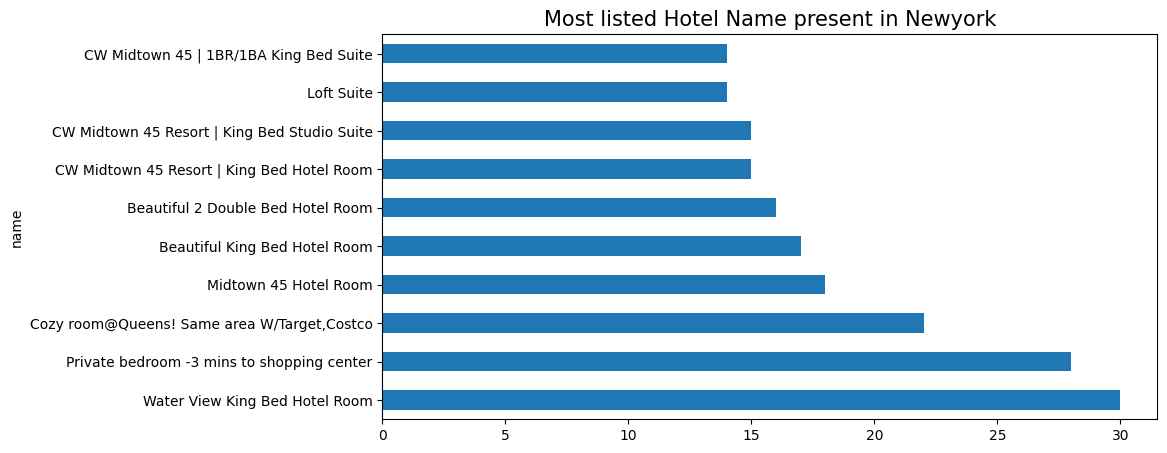

In [77]:
name = airbnb['name'].value_counts()[:10].plot(kind='barh', figsize = (10,5))
name.set_title('Most listed Hotel Name present in Newyork', size=15)

## B. COLUMN = host_name

### What are the most listed host name present in Airbnb NYC listing 2023?

Text(0.5, 1.0, 'Most listed Host Name')

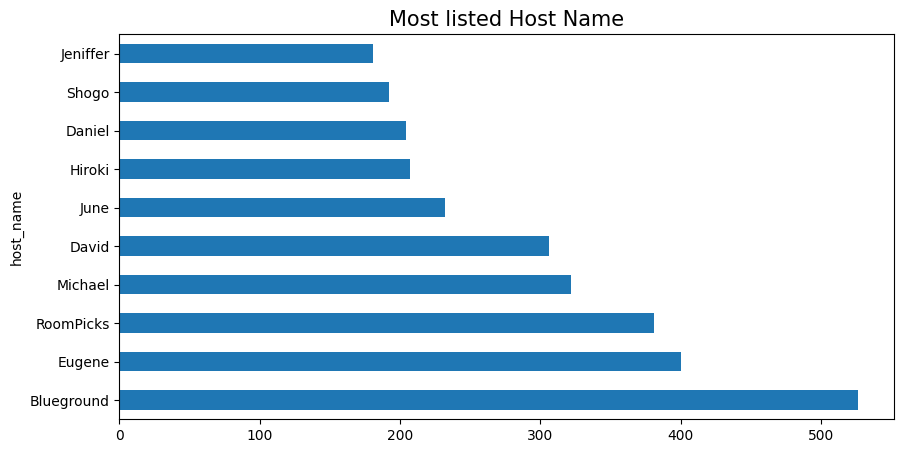

In [78]:
host_name = airbnb['host_name'].value_counts()[:10].plot(kind='barh', figsize = (10,5))
host_name.set_title('Most listed Host Name', size=15)

## C. COLUMN = neighbourhood_group
### Which neighbourhood geoup has highest listing and we try to show neighbourhood group vs price?


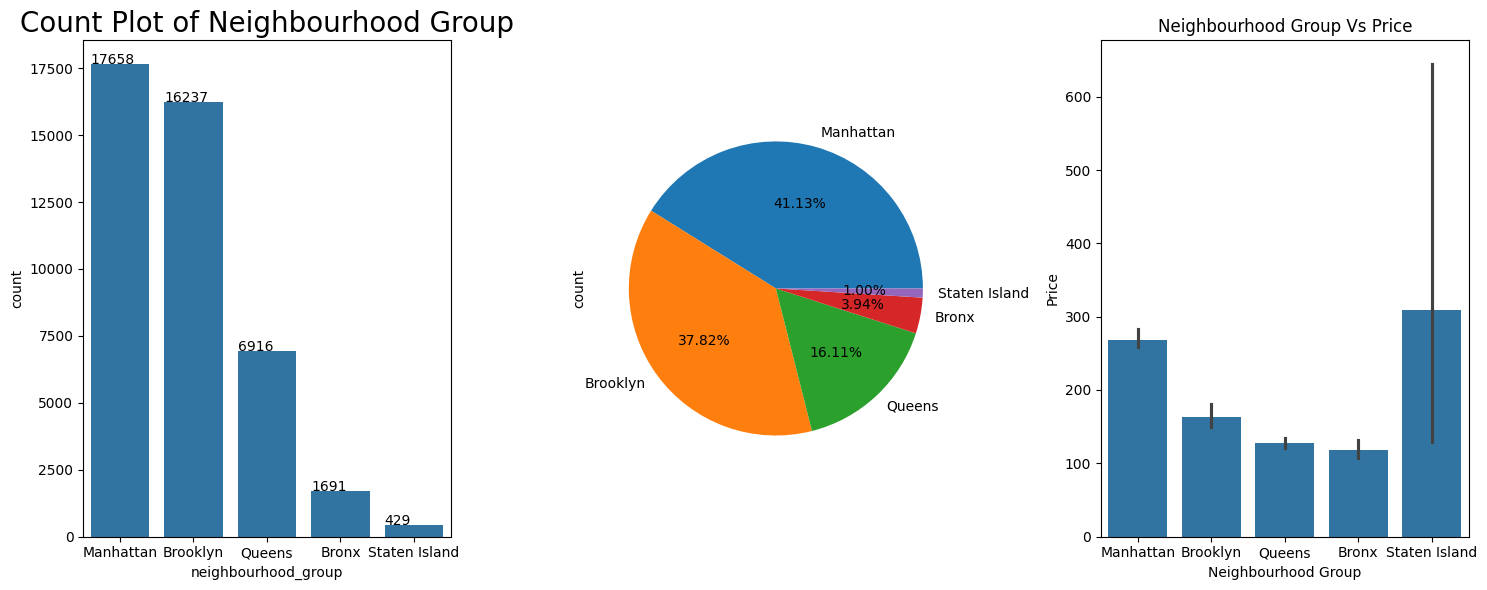

In [79]:

fig,ax = plt.subplots(1,3, figsize=(15,4))

# countplot
graph = sns.countplot(data=airbnb, x='neighbourhood_group', ax=ax[0])
graph.set_title('Count Plot of Neighbourhood Group', size=20)

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# piechart
airbnb['neighbourhood_group'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6))
plt.title('Percentage Distribution of Neighbourhood Group', size=20)

# Bi-variate analysis
# Neighbourhood Group Vs Price
bar = sns.barplot(data=airbnb, x='neighbourhood_group', y='price', ax = ax[2])
bar.set(xlabel='Neighbourhood Group', ylabel='Price', title='Neighbourhood Group Vs Price')

plt.tight_layout()
plt.show()

## D. COLUMN = neighbourhood
### Which neighbourhood has highest listing and we try to show neighbourhood vs price?

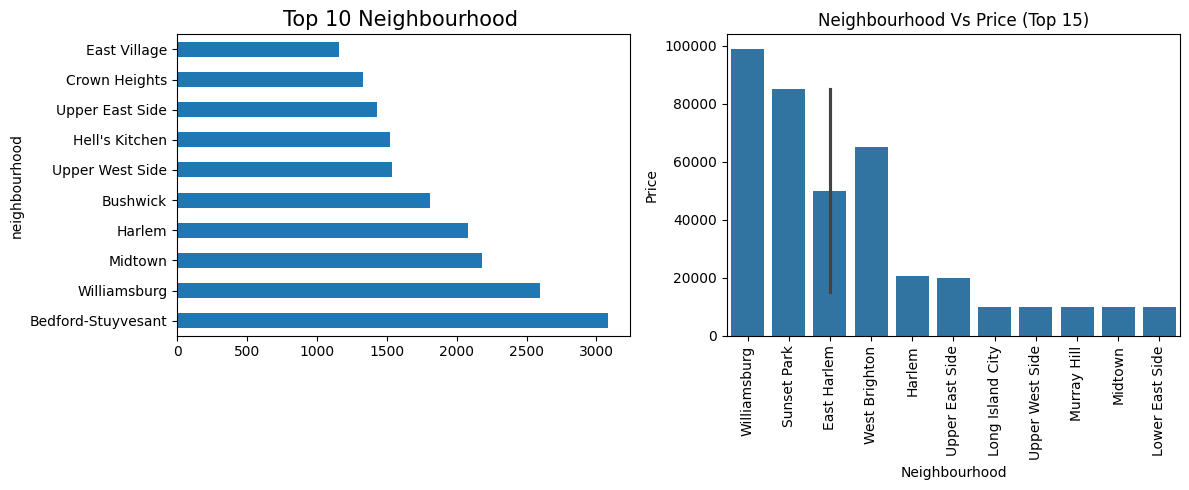

In [80]:

fig, ax = plt.subplots(1,2, figsize=(12,5))
neighbourhood = airbnb['neighbourhood'].value_counts()[:10].plot(kind='barh', ax=ax[0])
neighbourhood.set_title('Top 10 Neighbourhood ', size=15)


top15=airbnb.nlargest(15, 'price') # Bi-variate analysis (neighbourhood vs price)
bar = sns.barplot(data=top15, x='neighbourhood', y='price', ax=ax[1])
bar.set(xlabel='Neighbourhood', ylabel='Price', title='Neighbourhood Vs Price (Top 15)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## E. COLUMN = latitude and longitude

Text(0.5, 1.0, 'Location Coordinates')

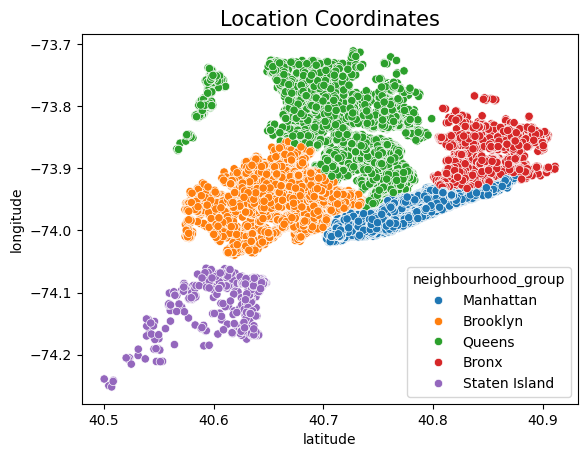

In [81]:
scatter = sns.scatterplot(x='latitude', y='longitude', hue='neighbourhood_group', data=airbnb)
scatter.set_title('Location Coordinates', size=15)

## F. COLUMN =room_type

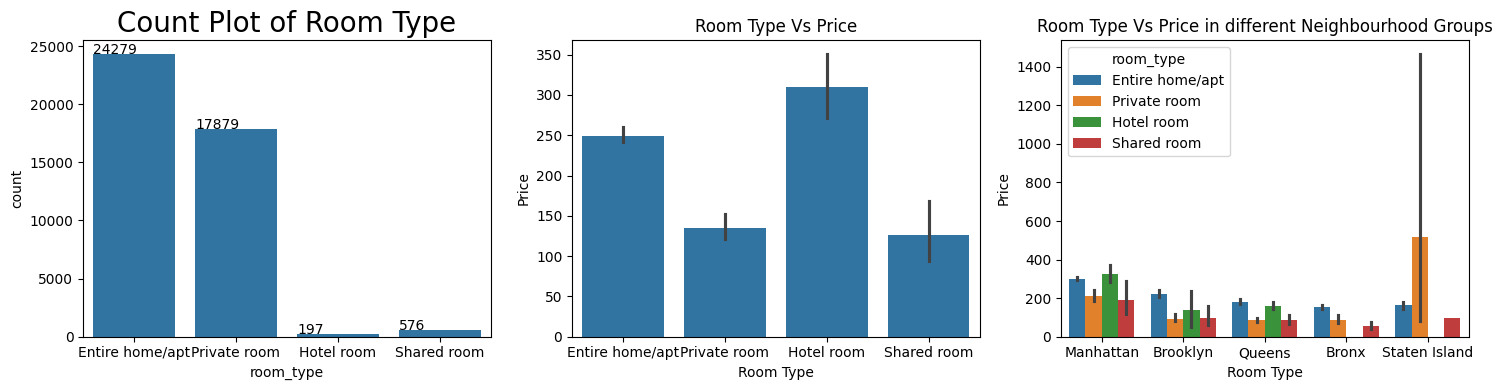

In [82]:

fig,ax = plt.subplots(1,3, figsize=(15,4))
# countplot
graph = sns.countplot(data=airbnb, x='room_type', ax=ax[0])
graph.set_title('Count Plot of Room Type', size=20)
# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))
# Bi-variate analysis
bar = sns.barplot(data=airbnb, x='room_type', y='price', ax = ax[1])
bar.set(xlabel='Room Type', ylabel='Price', title='Room Type Vs Price')

# Multivariate analysis
bar = sns.barplot(data=airbnb, x='neighbourhood_group', y='price', hue='room_type', ax = ax[2])
bar.set(xlabel='Room Type', ylabel='Price', title='Room Type Vs Price in different Neighbourhood Groups')

plt.tight_layout()
plt.show()

## G. COLUMN = price

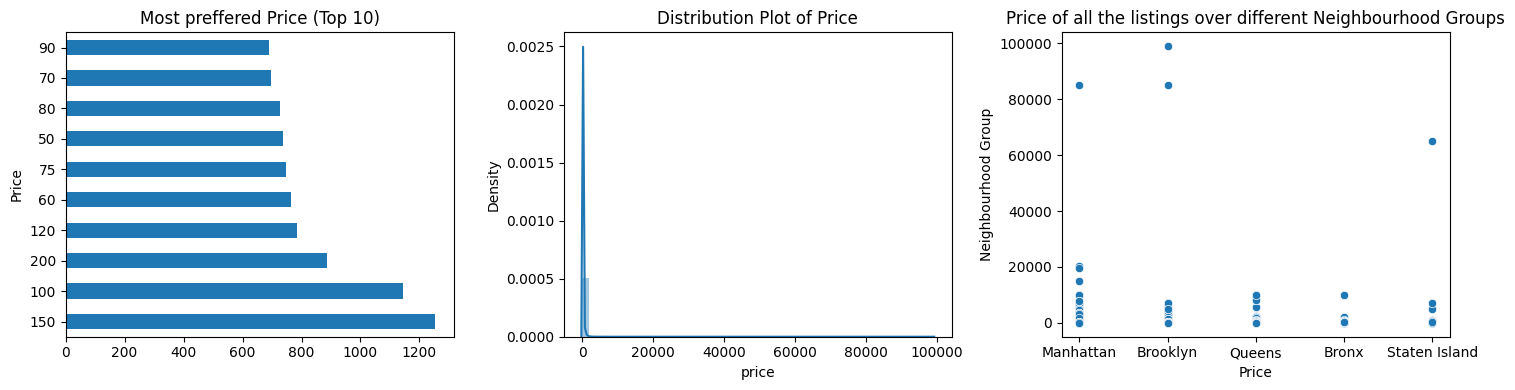

In [83]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
alos = airbnb['price'].value_counts()[:10].plot(kind='barh', ax=ax[0])
alos.set(title='Most preffered Price (Top 10)', ylabel='Price')

# Univariate analysis
dist = sns.distplot(airbnb.price, ax = ax[1])
dist.set_title('Distribution Plot of Price')

# Bi-variate analysis
scatter = sns.scatterplot(data=airbnb, x='neighbourhood_group', y='price', ax = ax[2])
scatter.set(xlabel='Price', ylabel='Neighbourhood Group', title='Price of all the listings over different Neighbourhood Groups')

plt.tight_layout()
plt.show()
     

## H. COLUMN = minimum_nights

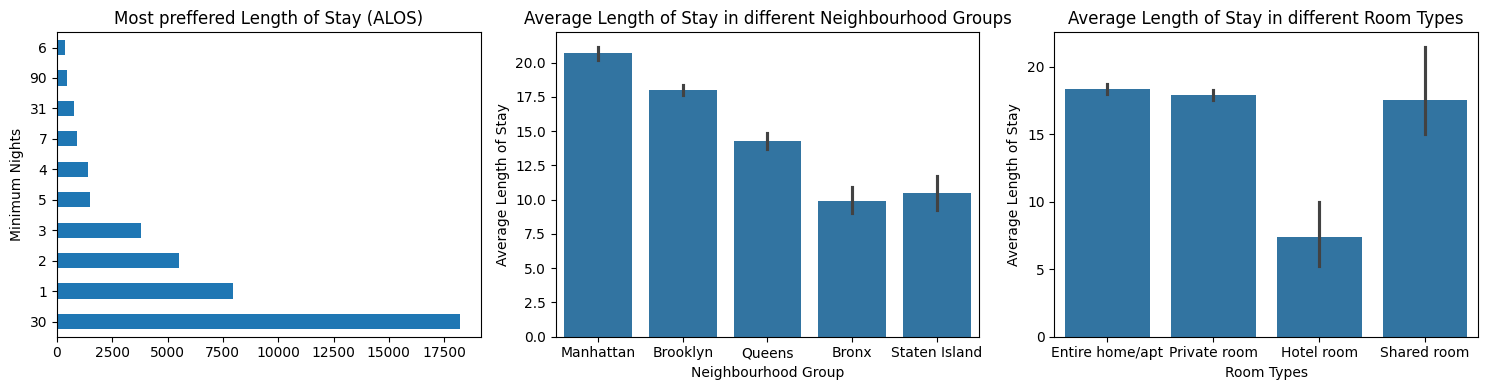

In [84]:

fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
alos = airbnb['minimum_nights'].value_counts()[:10].plot(kind='barh', ax=ax[0])
alos.set(title='Most preffered Length of Stay (ALOS)', ylabel='Minimum Nights')

# Bi-variate analysis
bar = sns.barplot(data=airbnb, x='neighbourhood_group', y='minimum_nights', ax = ax[1])
bar.set(xlabel='Neighbourhood Group', ylabel='Average Length of Stay', title='Average Length of Stay in different Neighbourhood Groups')

# Bi-variate analysis
bar = sns.barplot(data=airbnb, x='room_type', y='minimum_nights', ax = ax[2])
bar.set(xlabel='Room Types', ylabel='Average Length of Stay', title='Average Length of Stay in different Room Types')

plt.tight_layout()
plt.show()

## I. COLUMN = number_of_reviews

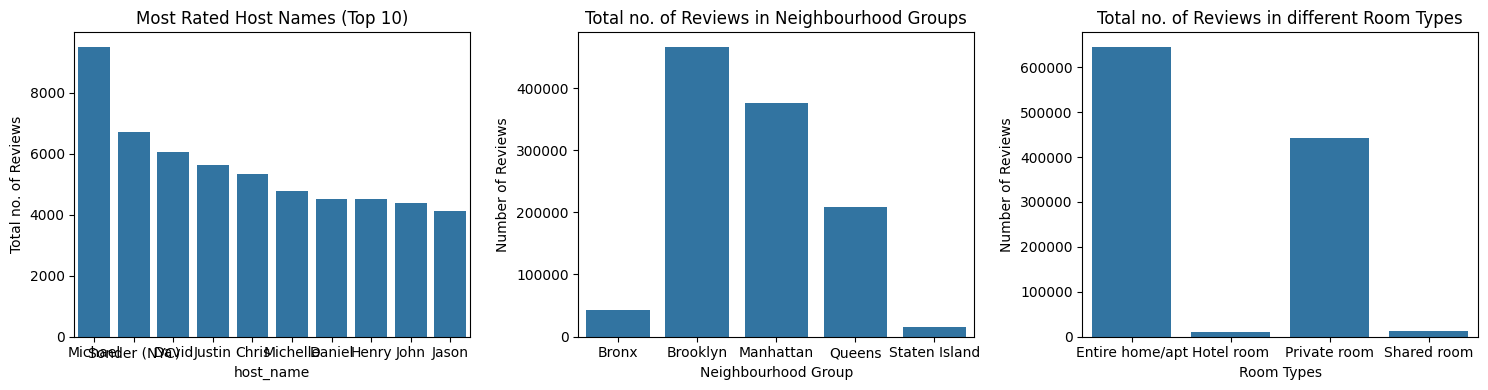

In [85]:

fig,ax = plt.subplots(1,3, figsize=(15,4))

# Bi-variate analysis
nor_host_name = airbnb[['number_of_reviews','host_name']].groupby('host_name').sum().sort_values(by='number_of_reviews', ascending=False)
top_10_nor = nor_host_name.head(10).reset_index()
nor = sns.barplot(x='host_name', y='number_of_reviews', data=top_10_nor, ax=ax[0])
nor.set(title='Most Rated Host Names (Top 10)', ylabel='Total no. of Reviews')

# Bi-variate analysis
nor_neighbourhood = airbnb[['number_of_reviews','neighbourhood_group']].groupby('neighbourhood_group').sum().reset_index()
bar = sns.barplot(data=nor_neighbourhood, x='neighbourhood_group', y='number_of_reviews', ax = ax[1])
bar.set(xlabel='Neighbourhood Group', ylabel='Number of Reviews', title='Total no. of Reviews in Neighbourhood Groups')

# Bi-variate analysis
nor_room_type = airbnb[['number_of_reviews','room_type']].groupby('room_type').sum().reset_index()
bar = sns.barplot(data=nor_room_type, x='room_type', y='number_of_reviews', ax = ax[2])
bar.set(xlabel='Room Types', ylabel='Number of Reviews', title='Total no. of Reviews in different Room Types')

plt.tight_layout()
plt.show()

## J. COLUMN = availability_365

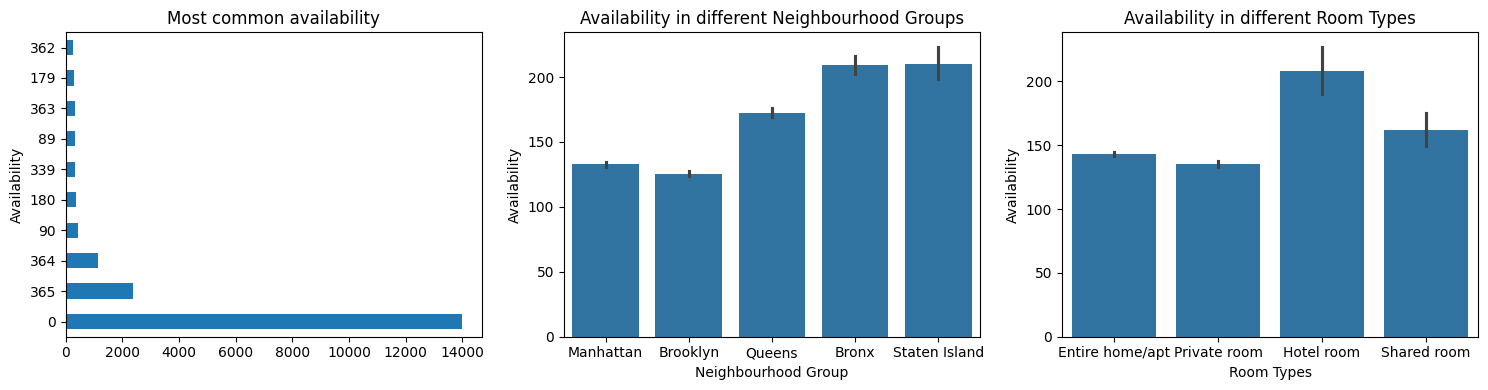

In [86]:

fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = airbnb['availability_365'].value_counts()[:10].plot(kind='barh', ax=ax[0])
count.set(title='Most common availability', ylabel='Availability')

# Bi-variate analysis
bar = sns.barplot(data=airbnb, x='neighbourhood_group', y='availability_365', ax = ax[1])
bar.set(xlabel='Neighbourhood Group', ylabel='Availability', title='Availability in different Neighbourhood Groups')

# Bi-variate analysis
bar = sns.barplot(data=airbnb, x='room_type', y='availability_365', ax = ax[2])
bar.set(xlabel='Room Types', ylabel='Availability', title='Availability in different Room Types')

plt.tight_layout()
plt.show()
     

## DATA CLEANING 
Data cleaning involves detecting and correcting or removing errors, inconsistencies, and missing values in a dataset. This essential step in data preparation ensures the dataset is accurate, complete, and ready for analysis. Data cleaning tasks include removing duplicate records, filling in missing values, correcting inaccuracies, and standardizing data formats. The primary objective of data cleaning is to enhance the quality of the data, making it suitable for further analysis and modeling.

### Duplicate values

In [15]:
airbnb.duplicated().sum()

0

### Missing values

In [16]:
print(airbnb.isnull().sum())

id                                    0
name                                 12
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                 10304
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           42930
dtype: int64


### Missing values percentage

In [17]:

round(airbnb.isna().sum()/len(airbnb)*100, 2)

id                                  0.00
name                                0.03
host_id                             0.00
host_name                           0.01
neighbourhood_group                 0.00
neighbourhood                       0.00
latitude                            0.00
longitude                           0.00
room_type                           0.00
price                               0.00
minimum_nights                      0.00
number_of_reviews                   0.00
last_review                        24.00
reviews_per_month                  24.00
calculated_host_listings_count      0.00
availability_365                    0.00
number_of_reviews_ltm               0.00
license                           100.00
dtype: float64

In [92]:
airbnb.shape

(42931, 18)

## HANDLING MISSING VALUES
The approach to handling null values in the dataset involves different strategies depending on the percentage of missing values in each column. Columns with less than 5% null values, such as 'name' and 'host_name', have their null values removed. For columns like 'last_review' and 'reviews_per_month' where null values exceed 20%, these columns are not used in exploratory data analysis (EDA) due to their lack of meaningful information, and are therefore removed from the dataset to ensure cleanliness and relevance.


In [18]:
# features which has less than 5%  null values present. ( Dropping rows)
nan_columns = ['name', 'host_name']
# dropping null values
airbnb.dropna(subset=nan_columns, inplace=True)
# features which has more than 5%  null values present. ( Dropping column in this case)
columns_to_drop = ['last_review', 'reviews_per_month','license' ]

# dropping null values
airbnb.drop('last_review', axis=1, inplace=True)
airbnb.drop('reviews_per_month', axis=1, inplace=True)
airbnb.drop('license',axis=1, inplace=True)
     
# Checking again missing values/null values Count
print(airbnb.isnull().sum())

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64


In [19]:
#checking the shape of the data after missing values treatment
airbnb.shape
     

(42914, 15)

## SKEWNESS
###statistical summary

In [20]:
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,42914.0,2.223653e+17,3.344583e+17,2595.000000,1.941504e+07,4.337572e+07,6.306084e+17,8.404660e+17
host_id,42914.0,1.516444e+08,1.621464e+08,1678.000000,1.606864e+07,7.448882e+07,2.681988e+08,5.038729e+08
latitude,42914.0,4.072826e+01,5.763445e-02,40.500314,4.068748e+01,4.072403e+01,4.076229e+01,4.091138e+01
longitude,42914.0,-7.394366e+01,5.663444e-02,-74.251907,-7.398175e+01,-7.395262e+01,-7.392403e+01,-7.371087e+01
price,42914.0,2.003367e+02,8.952574e+02,0.000000,7.500000e+01,1.250000e+02,2.000000e+02,9.900000e+04
minimum_nights,42914.0,1.810710e+01,2.746690e+01,1.000000,2.000000e+00,7.000000e+00,3.000000e+01,1.250000e+03
number_of_reviews,42914.0,2.586538e+01,5.662548e+01,0.000000,1.000000e+00,5.000000e+00,2.400000e+01,1.842000e+03
calculated_host_listings_count,42914.0,2.406383e+01,8.088270e+01,1.000000,1.000000e+00,1.000000e+00,4.000000e+00,5.260000e+02
availability_365,42914.0,1.403178e+02,1.420022e+02,0.000000,0.000000e+00,8.900000e+01,2.890000e+02,3.650000e+02
number_of_reviews_ltm,42914.0,7.739572e+00,1.829323e+01,0.000000,0.000000e+00,1.000000e+00,7.000000e+00,1.093000e+03


### Observation
The statistical summary of numerical features reveals a notable disparity between the 75th percentile and the maximum value, suggesting skewness and presence of outliers within the dataset.

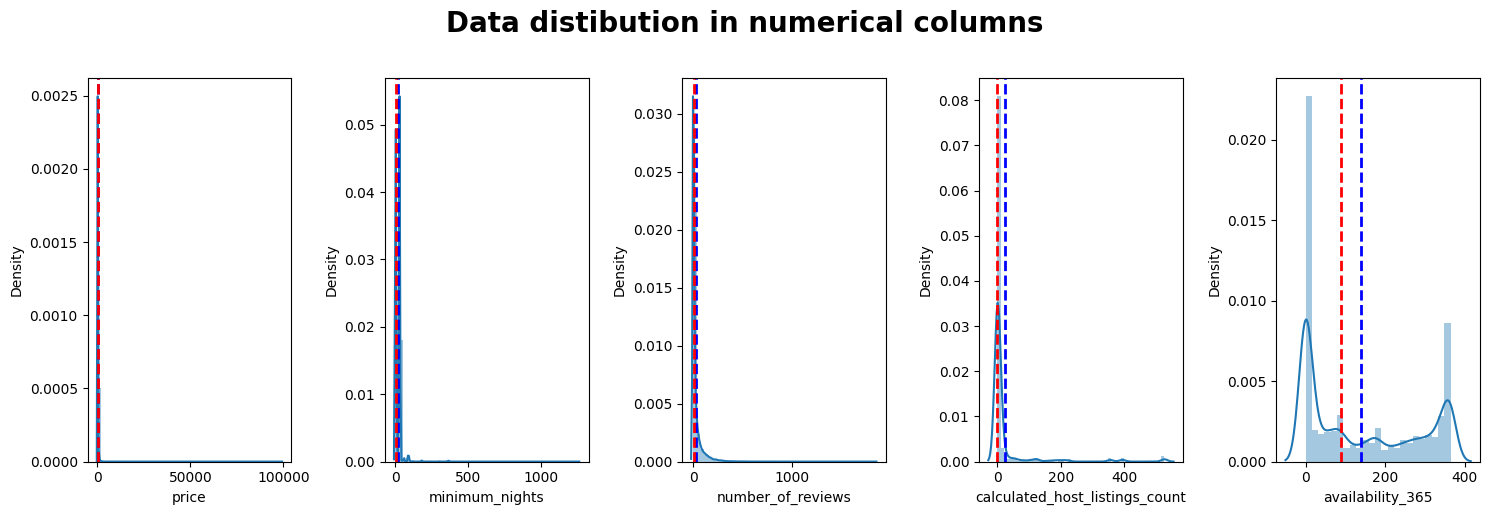

In [97]:
numerical_features =['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
plt.figure(figsize=(15,5)) #figsize
plt.suptitle('Data distibution in numerical columns', fontsize=20, fontweight='bold', y=1.02) #title

for i,col in enumerate(numerical_features):
  plt.subplot(1, 5, i+1)                      # subplots of 1 rows and 5 columns

  # distplot
  sns.distplot(airbnb[col])
  # mean line
  plt.axvline(airbnb[col].mean(), color='blue', linestyle='dashed', linewidth=2)
  # median line
  plt.axvline(airbnb[col].median(), color='red', linestyle='dashed', linewidth=2)
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()    


### Observation
Numerical features generally exhibit right-skewed distributions. Removing outliers can potentially normalize some variables. Therefore, the approach involves first eliminating outliers and subsequently reassessing the need for transformation techniques.

### TREATING OUTLIERS

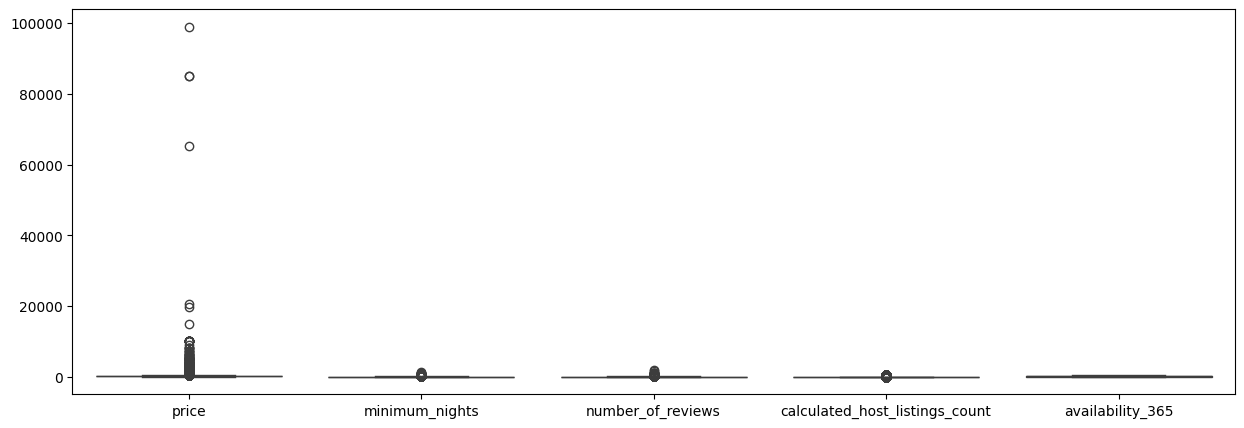

In [98]:
plt.figure(figsize=(15,5)) #figsize
sns.boxplot(data=airbnb[numerical_features]) #boxplot
plt.show()

### Clipping method
The Clipping Method involves setting boundaries for outlier values. If a value exceeds these boundaries, it is considered an outlier and replaced with either the minimum or maximum value within the defined range."


### Replace the datapoints with upper and lower bound of all the outliers

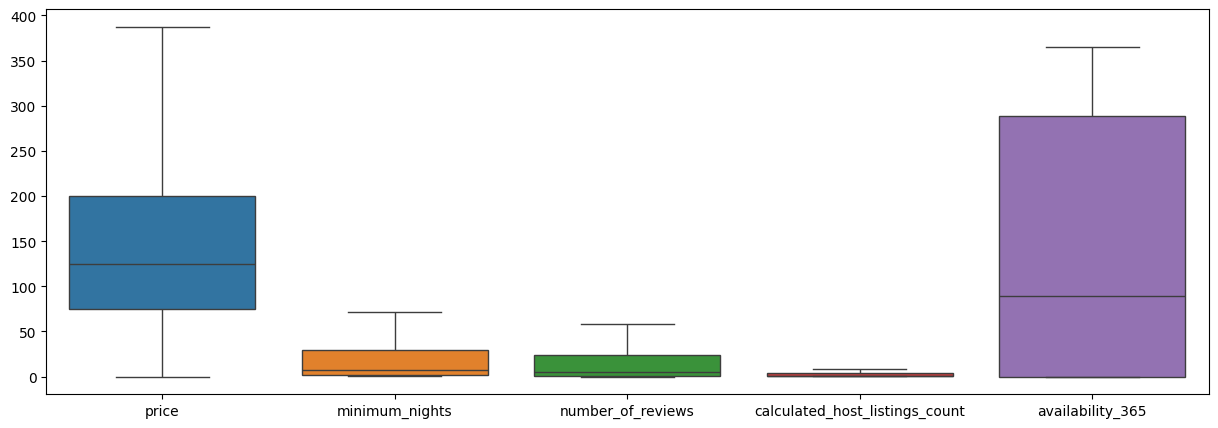

In [99]:
def clip_outliers(airbnb):
    for col in airbnb[numerical_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = airbnb[col].quantile(0.25)
        q3 = airbnb[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        airbnb[col] = airbnb[col].clip(lower_bound, upper_bound)
    return airbnb
     
# using the function to treat outliers
airbnb = clip_outliers(airbnb)
     
# checking the boxplot after outlier treatment
plt.figure(figsize=(15,5))
sns.boxplot(data=airbnb[numerical_features])
plt.show()

### Distribution after treating outliers

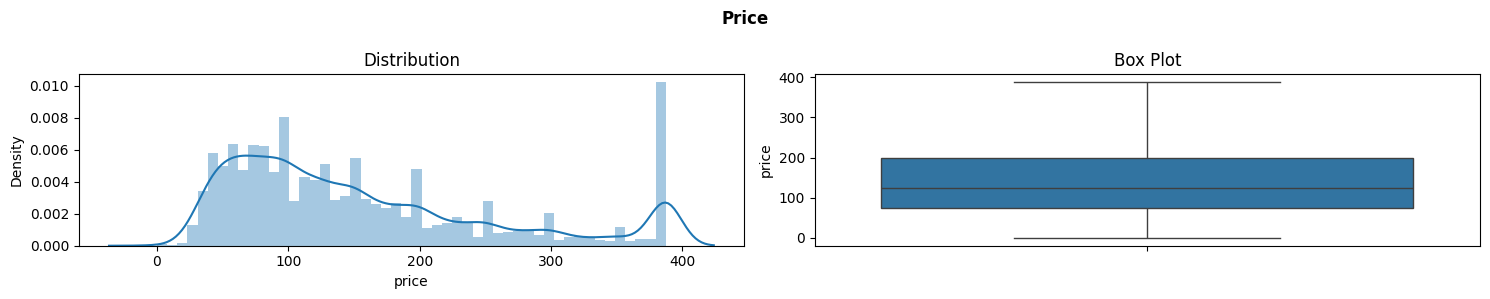

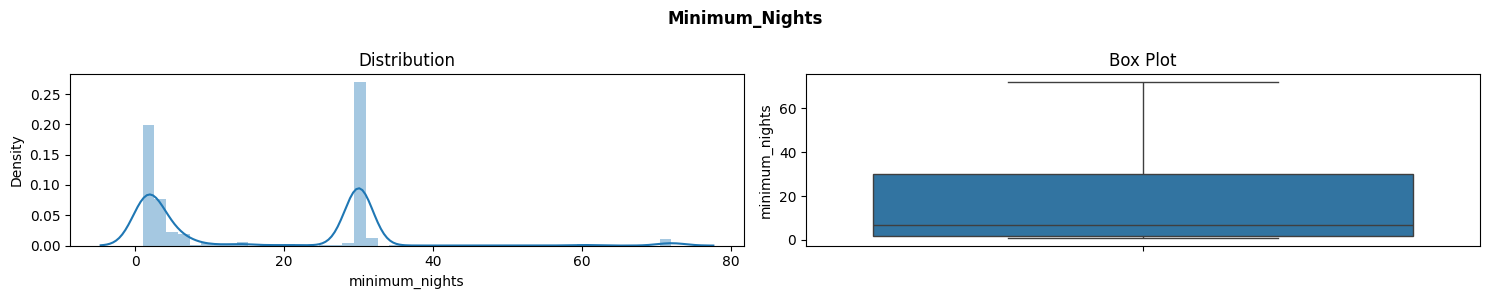

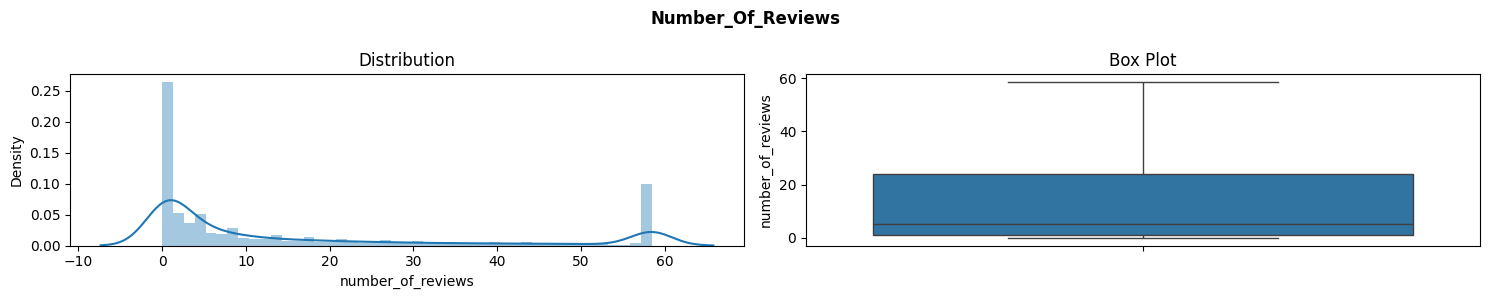

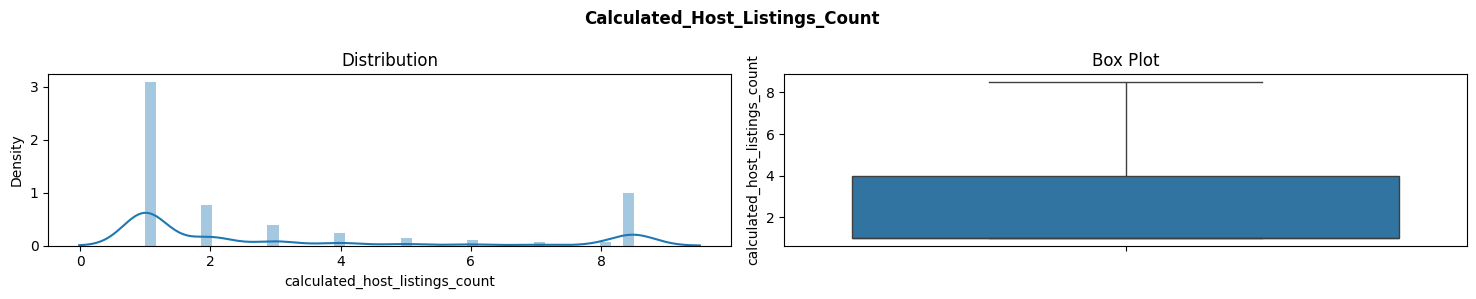

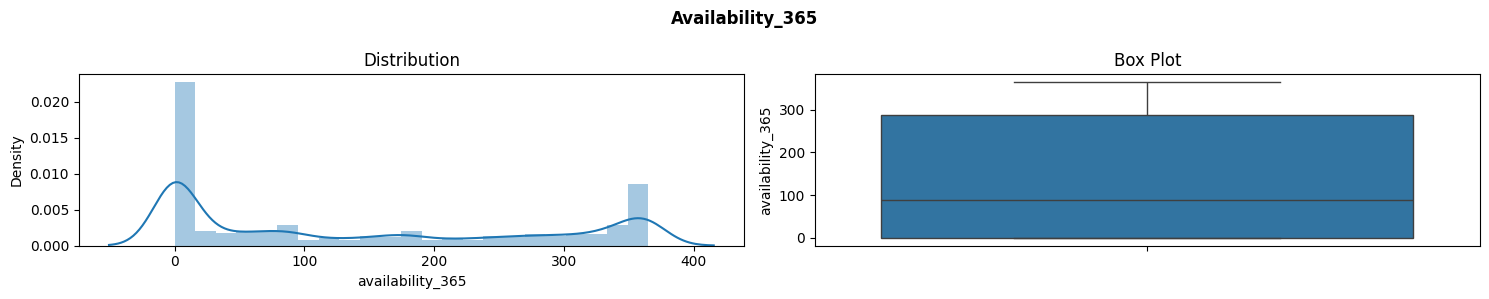

In [100]:
for col in numerical_features:
  fig, ax =plt.subplots(1,2, figsize=(15,3))
  sns.distplot(airbnb[col], ax=ax[0]).set(title="Distribution")
  sns.boxplot(airbnb[col], ax=ax[1]).set(title="Box Plot")
  plt.suptitle(f'{col.title()}',weight='bold')
  plt.tight_layout()

### Observation
After addressing outliers, noticeable changes are observed in the distribution of the data. Previously skewed features tend to approximate a normal distribution following outlier treatment

### Reviewing outlier's in minimum nights

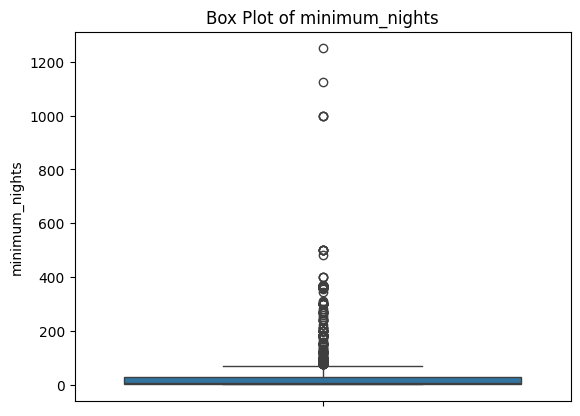

In [61]:
sb.boxplot(y=airbnb_df['minimum_nights'])
plt.title('Box Plot of minimum_nights')
plt.show()

In [62]:
lower_bound = 1    # we manually assign the lower bount as 1 because its not possiblel to have less than 1 minimum night requirment for booking.
upper_bound = 90  # the reson behind it explained below

outliers_count = ((airbnb_df['minimum_nights'] < lower_bound) | (airbnb_df['minimum_nights'] > upper_bound)).sum()  #  is the count of outliers
outliers_count

278

In [63]:
airbnb_df = airbnb_df[(airbnb_df['minimum_nights'] >= lower_bound) & (airbnb_df['minimum_nights'] <= upper_bound)]

In [64]:
airbnb_df["minimum_nights"].describe()

count    42636.000000
mean        16.611314
std         16.078137
min          1.000000
25%          2.000000
50%          7.000000
75%         30.000000
max         90.000000
Name: minimum_nights, dtype: float64

### Review Outlier's in Price

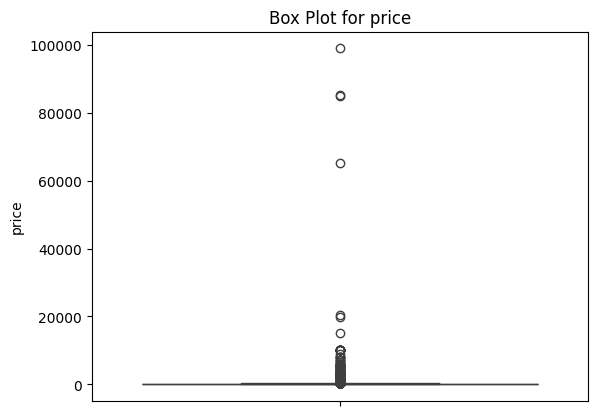

In [65]:
sb.boxplot(y=airbnb_df['price'])
plt.title('Box Plot for price')
plt.show()
# so the highest price is 10000 and it is possible to have such high price in NYC, it can have a luxurious prpperty
#so we are not going to remove them

In [66]:
airbnb_df["price"].describe()

count    42636.000000
mean       200.007740
std        896.432746
min          0.000000
25%         75.000000
50%        125.000000
75%        200.000000
max      99000.000000
Name: price, dtype: float64

In [67]:
# removing price == 0
airbnb_df = airbnb_df[airbnb_df['price'] != 0]
airbnb_df["price"].describe()

count    42609.000000
mean       200.134479
std        896.702585
min         10.000000
25%         75.000000
50%        125.000000
75%        200.000000
max      99000.000000
Name: price, dtype: float64

### Review of Outlier's in availability_365

In [68]:
airbnb_df["availability_365"].describe()
# here we can see the minimum availability is 0 it means there is a possibility of the place is booked for entire year

count    42609.000000
mean       140.376024
std        141.914787
min          0.000000
25%          0.000000
50%         89.000000
75%        289.000000
max        365.000000
Name: availability_365, dtype: float64

In [69]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.3,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.3,2,365,0,NaN


In [71]:
# lets remove them
invalid_availability = (airbnb_df["availability_365"] == 365) & (airbnb_df["number_of_reviews"] > 0)
airbnb_df = airbnb_df.loc[~invalid_availability]
airbnb_df.head()
# now we can see the availability of 365 days with more than o reviews are removed

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN
5,29628,"Comfortable, Sunny Room",127608,Chris,Brooklyn,Clinton Hill,40.68292,-73.96381,Private room,93,3,350,2023-02-27,2.25,1,145,48,NaN


# Q. What is the average price by room type?

In [72]:
avg_price = airbnb_df.groupby("room_type")["price"].mean().reset_index()
avg_price

,room_type,price
0,Entire home/apt,245.330356
1,Hotel room,358.228395
2,Private room,132.686722
3,Shared room,130.225243


In [73]:
colors = sb.color_palette("Set2")

/tmp/ipykernel_28228/1618927243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='room_type', y='price', data=airbnb_df, palette=colors) # creat a barplot
/tmp/ipykernel_28228/1618927243.py:3: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sb.barplot(x='room_type', y='price', data=airbnb_df, palette=colors) # creat a barplot


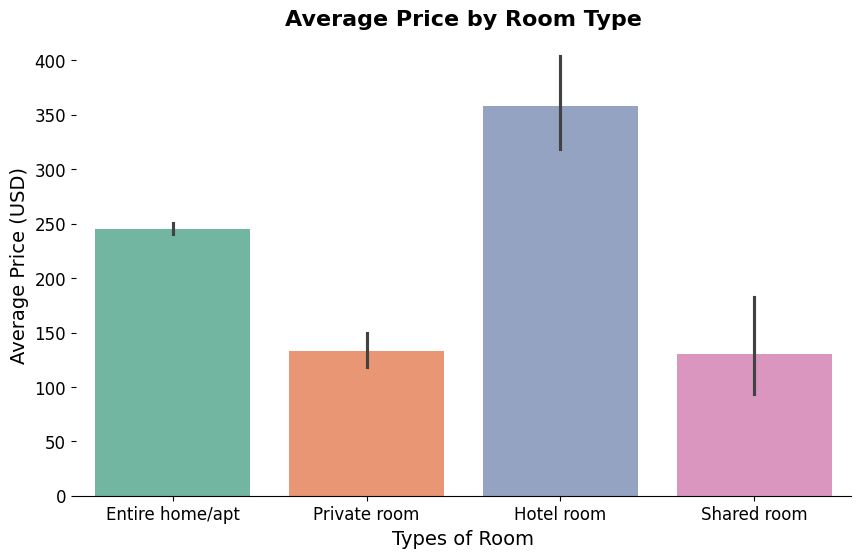

In [74]:
plt.figure(figsize=(10, 6))  # to asigne the size of the figure

sb.barplot(x='room_type', y='price', data=airbnb_df, palette=colors) # creat a barplot
plt.title('Average Price by Room Type', fontsize=16, fontweight='bold')      # give title
plt.xlabel('Types of Room', fontsize=14)        # assigning xlabel
plt.ylabel('Average Price (USD)', fontsize=14)  # assigning ylabel
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sb.despine(left=True)
plt.show()                      # show the final plot

# Q. Which room type has more reviews?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


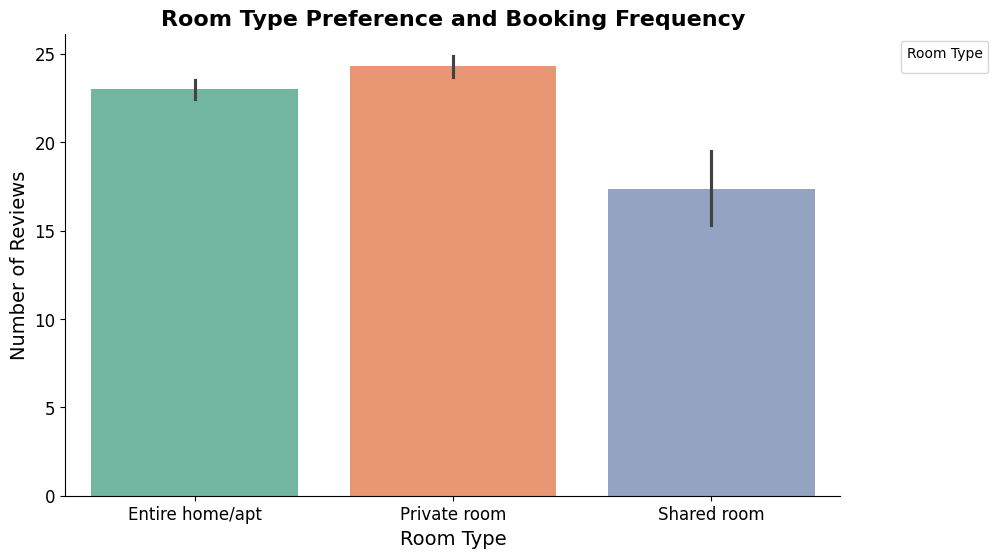

In [31]:
# Creating a bar plot using Seaborn, with room_type on the x-axis, number_of_reviews on the y-axis,
plt.figure(figsize=(10, 6))
sb.barplot(x='room_type', y='number_of_reviews', hue='room_type', data=airbnb_df, palette='Set2')
# giving title and increasing size for better view
plt.title('Room Type Preference and Booking Frequency', fontsize=16, fontweight='bold')
# giving x and y label
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
# Setting the font size of x-axis and y-axis tick labels to 12 for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Room Type', loc='upper right', bbox_to_anchor=(1.2, 1))
sb.despine()
plt.show()
     

# Q. What is the room type preference in different neighbourhoods?

<Figure size 1000x600 with 0 Axes>

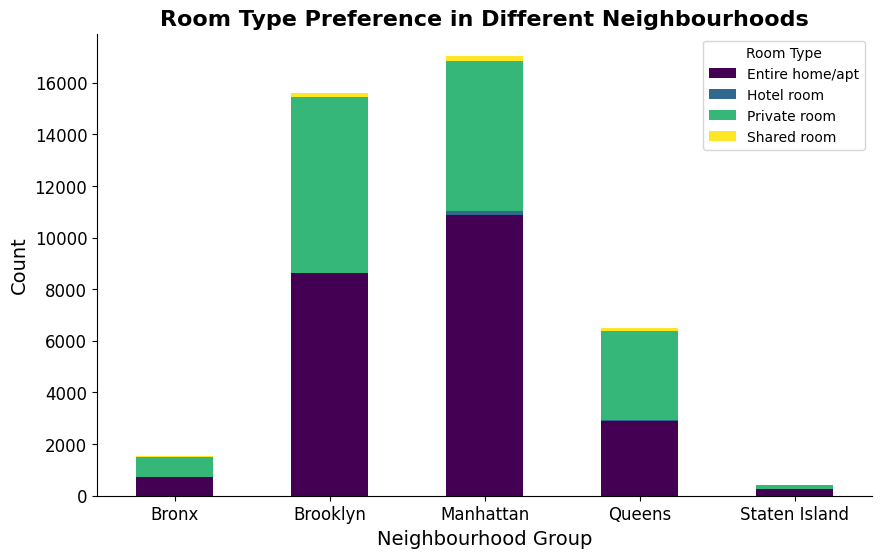

In [75]:
# Room Type Preference in Different Neighbourhoods
plt.figure(figsize=(10, 6))
# Group the data by 'neighbourhood_group' and 'room_type', count the number of listings (id's),
# and unstack the data to have 'room_type' as columns and 'neighbourhood_group' as index
room_type_neighbourhood = airbnb_df.groupby(['neighbourhood_group', 'room_type'])['id'].count().unstack()
# giving chart type , colour and size
room_type_neighbourhood.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Room Type Preference in Different Neighbourhoods', fontsize=16, fontweight='bold')
plt.xlabel('Neighbourhood Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
# Rotating x-axis labels and increase in font size for better view
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
# Add a legend to the plot with the title 'Room Type'.
plt.legend(title='Room Type')
sb.despine()
plt.show()


# Q. What is the seasonal trend in airbnb prices?

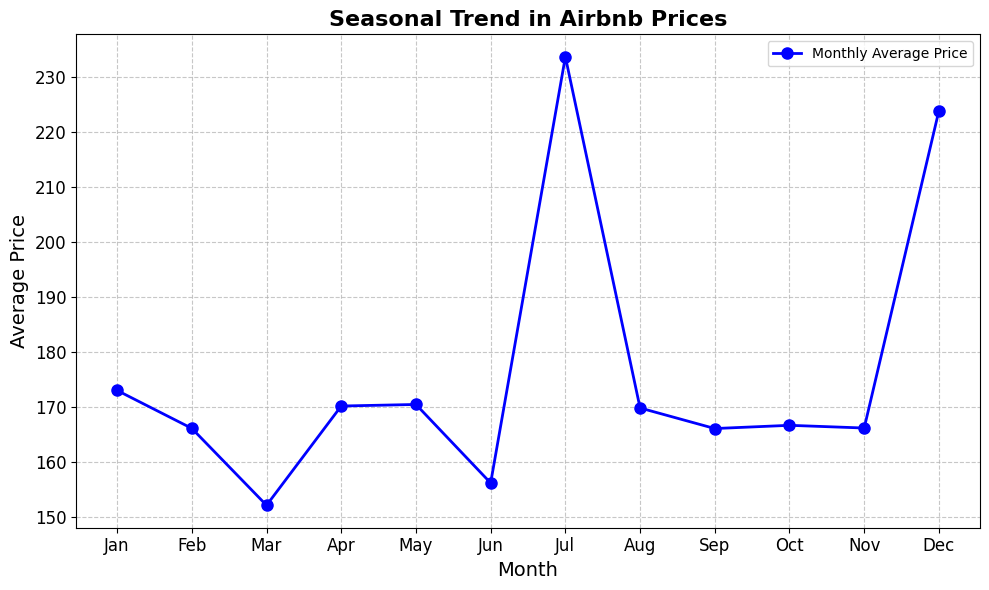

In [78]:

# Extracting the month from the 'last_review' column and create a new column 'month'
airbnb_df['month'] = airbnb_df['last_review'].dt.month

# Group the data by month and calculate the average price for each month
monthly_avg_price = airbnb_df.groupby('month')['price'].mean()

# Create a time series line chart for the monthly average price
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_price.index, monthly_avg_price.values, marker='o', color='b', linewidth=2, markersize=8, label='Monthly Average Price')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Seasonal Trend in Airbnb Prices', fontsize=16, fontweight='bold')
# Set x-axis ticks to represent months from January to December
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
# Add gridlines to the plot with dashed lines (linestyle='--') and reduced opacity (alpha=0.7)
plt.grid(True, linestyle='--', alpha = 0.7)
# Ensure tight layout for better spacing between elements in the plot
plt.tight_layout()
plt.show()

# Q. Which neighbourhood has more reviews?

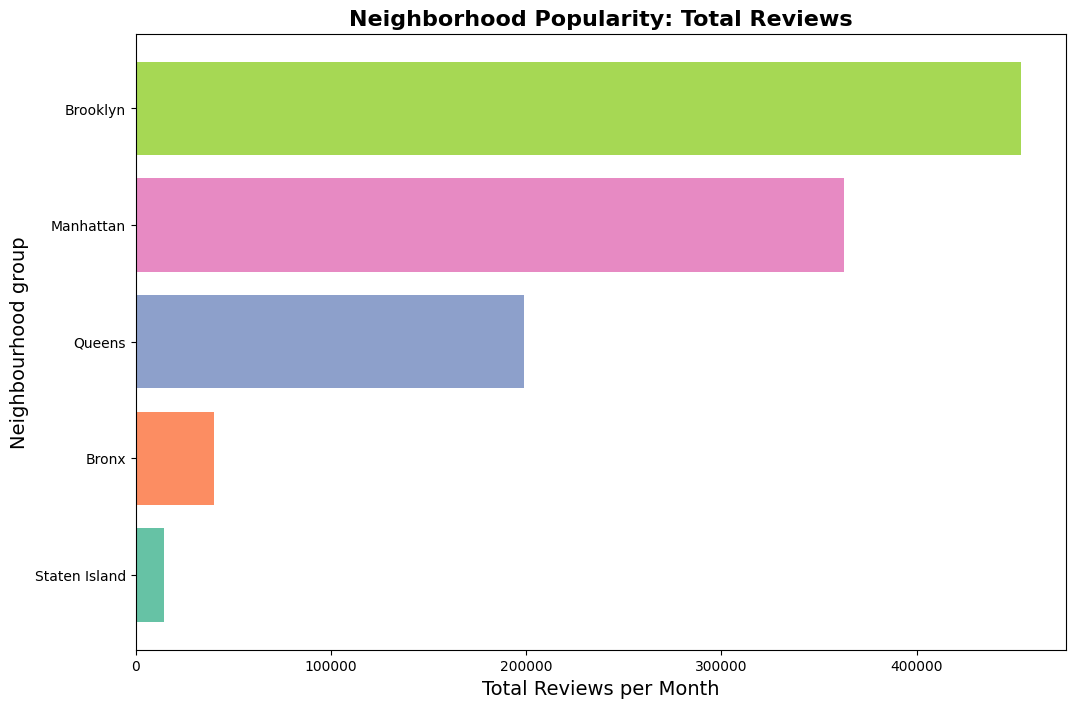

In [81]:
# calculating total reviews by grouping the data
total_reviews = airbnb_df.groupby('neighbourhood_group')['number_of_reviews'].sum().reset_index()
# creating the data frame of the grouped data
df = pd.DataFrame(total_reviews).sort_values(by = "number_of_reviews", ascending= True)
# Setting the color palette
colors = sb.color_palette("Set2")

# ploting barchart
plt.figure(figsize=(12, 8))
plt.barh(df['neighbourhood_group'], df['number_of_reviews'],  color=colors)

# Set labels and title
plt.xlabel('Total Reviews per Month', fontsize=14)
plt.ylabel('Neighbourhood group', fontsize=14)
plt.title("Neighborhood Popularity: Total Reviews" , fontsize=16, fontweight='bold')


plt.show()

# Q. What are top 5 neighbourhood by listing count in each neighbourhood group?

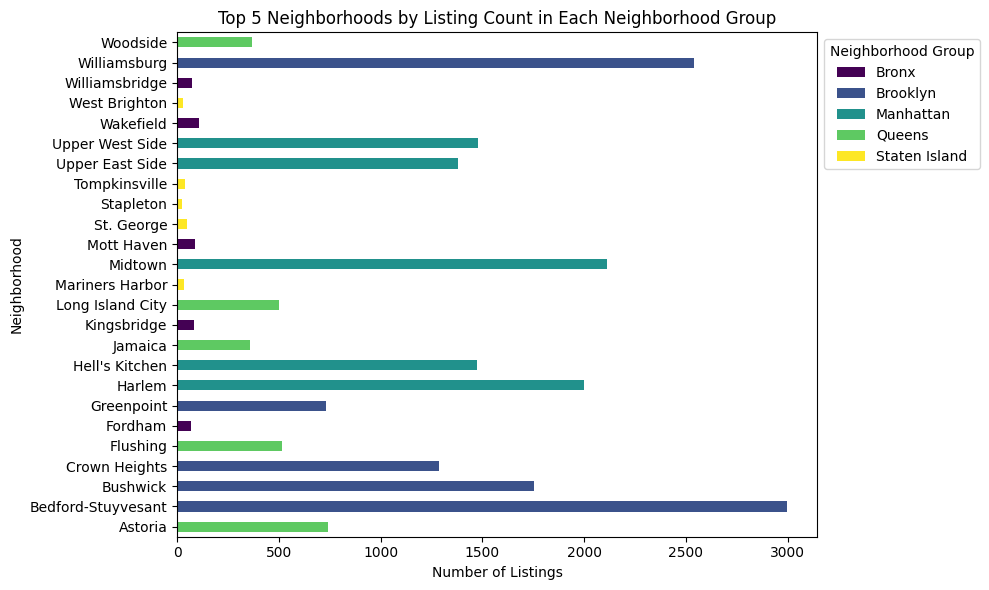

In [82]:

top_n_neighborhoods = 5  # You can adjust this number based on your preference

# Group by 'neighbourhood_group' and 'neighbourhood', count the number of listings, and sort the values
neighborhood_counts = airbnb_df.groupby(['neighbourhood_group', 'neighbourhood']).size().reset_index(name='count')
neighborhood_counts_sorted = neighborhood_counts.sort_values(by=['neighbourhood_group', 'count'], ascending=[True, False])

# Select the top N neighborhoods for each neighborhood group
top_neighborhoods = neighborhood_counts_sorted.groupby('neighbourhood_group').head(top_n_neighborhoods)

# Create a horizontal stacked bar chart for the top N neighborhoods
pivot_table = top_neighborhoods.pivot(index='neighbourhood', columns='neighbourhood_group', values='count')
pivot_table.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title(f'Top {top_n_neighborhoods} Neighborhoods by Listing Count in Each Neighborhood Group')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.legend(title='Neighborhood Group', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Q. What is average availability by neighbourhood group?

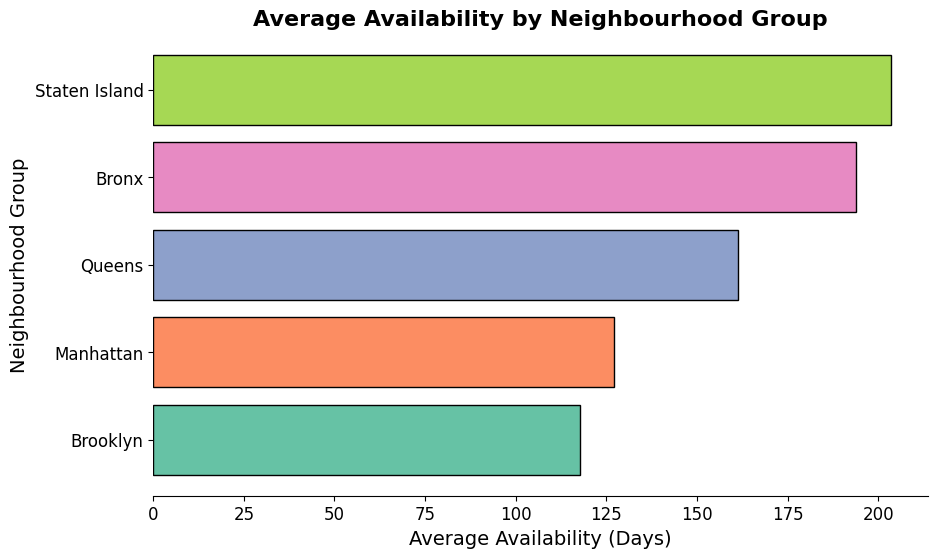

In [83]:
# lets see wich neighbourhood group is mostly booked or popular
availability = airbnb_df.groupby("neighbourhood_group")["availability_365"].mean()   # lets cheq avrage availability
df = pd.DataFrame(availability).reset_index() # converting to data frame
availability = df.sort_values(by ="availability_365", ascending= True)  # sorting the value for better view

colors = sb.color_palette("Set2")

plt.figure(figsize=(10, 6))
bars = plt.barh(availability["neighbourhood_group"], availability["availability_365"], color=colors, edgecolor='black')  # ploting horizontall barplot
plt.title("Average Availability by Neighbourhood Group", fontsize=16, fontweight='bold')
plt.xlabel("Average Availability (Days)", fontsize=14)
plt.ylabel("Neighbourhood Group", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sb.despine(left=True)  # Removing left spine for a cleaner look

plt.show()

# Q. What are the correlations among the selected columns including price?

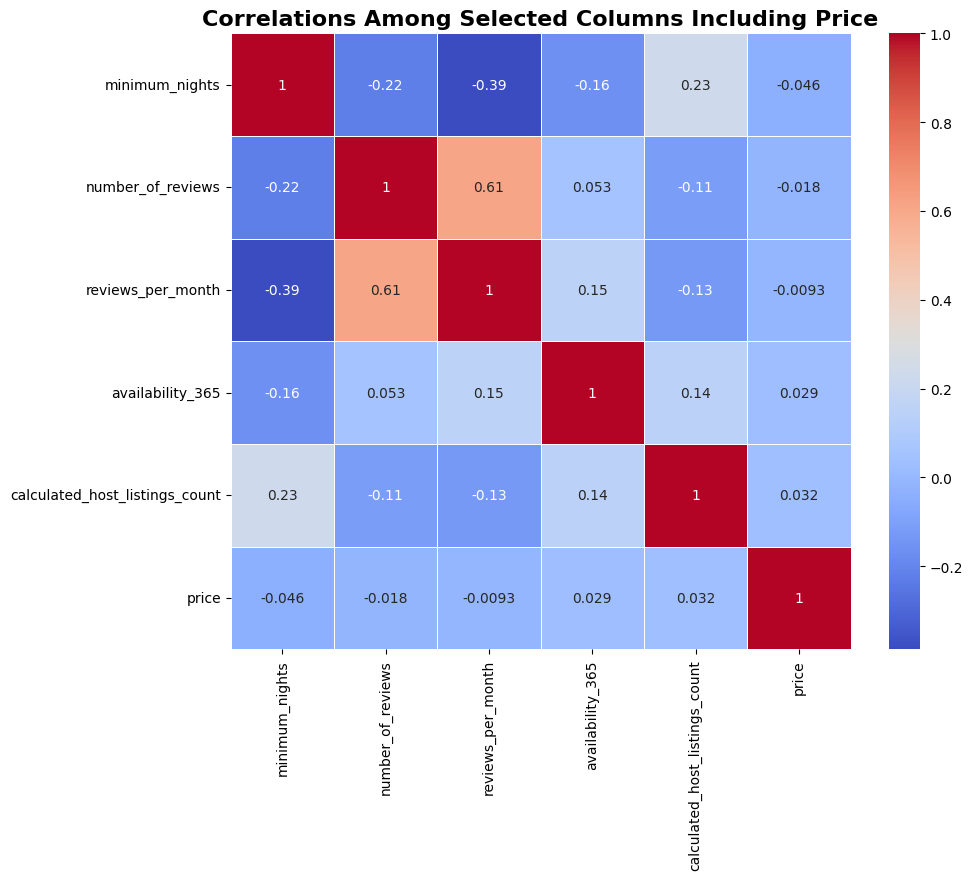

In [84]:

# Defining a list of selected columns to include in the correlation analysis
selected_columns = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count', 'price']
# Calculating the correlation matrix using the selected columns
correlation_matrix = airbnb_df[selected_columns].corr()

plt.figure(figsize=(10, 8))
# Generating a heatmap of the correlation matrix with annotations, using the 'coolwarm' color map
# The annotations display the correlation coefficients within the heatmap cells
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlations Among Selected Columns Including Price', fontsize=16, fontweight='bold')
plt.show()


# Q. What is price distribution?

The analysis reveals several correlations between key variables and Airbnb listing prices. Properties with higher minimum night requirements, more reviews, and higher monthly review rates tend to command slightly higher prices, suggesting a modest positive relationship. Conversely, the availability of properties throughout the year shows no strong correlation with pricing. Hosts managing multiple listings also tend to price their properties slightly higher. These insights underscore the complex interplay of factors influencing pricing decisions in the Airbnb market, highlighting the need for further exploration into additional variables that may influence pricing strategies.

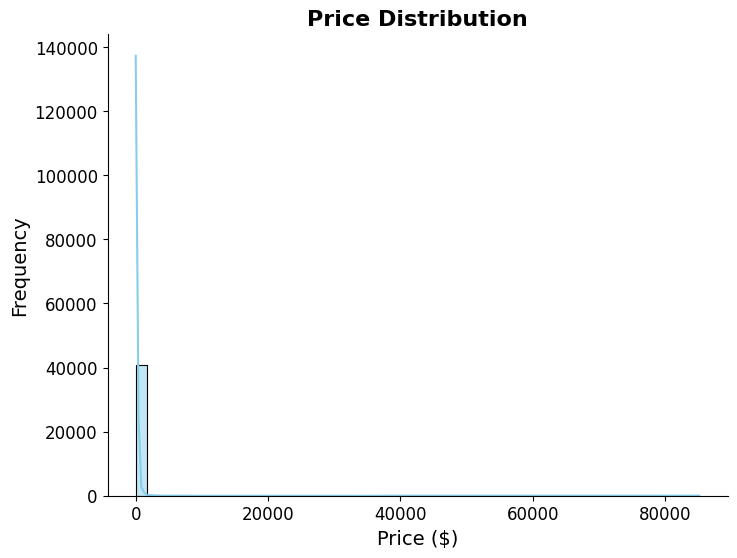

In [85]:

# lets see the price distribution
plt.figure(figsize=(8, 6))
# creating histogram Using 50 bins and enable kernel density estimation (kde) for a smooth curve
sb.histplot(airbnb_df["price"], bins=50, kde=True, color="skyblue")
plt.title("Price Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Remove the top and right spines for a cleaner look using Seaborn's 'despine' function
sb.despine()
plt.show()
     

# Q. What are number of reviews vs price?

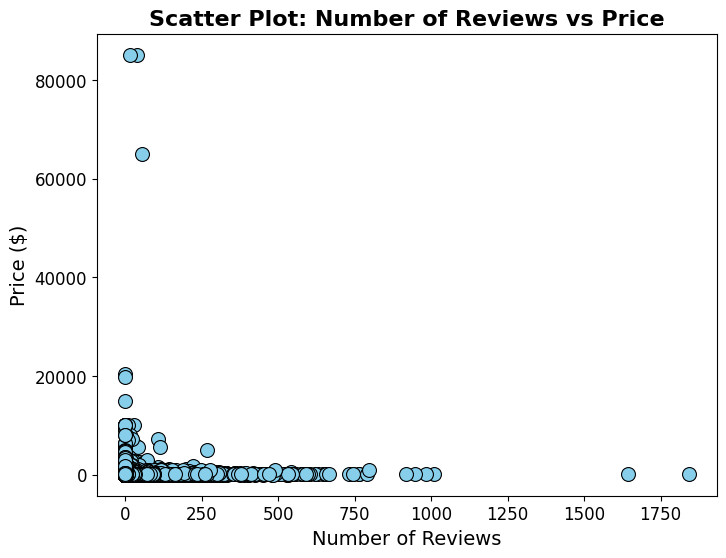

In [86]:

plt.figure(figsize=(8, 6))
# Generating a scatter plot using 'number_of_reviews' on the x-axis and 'price' on the y-axis to finde relation between it
sb.scatterplot(x="number_of_reviews", y="price", data=airbnb_df, color="skyblue", edgecolor="black", s=100)

# Set plot labels and title
plt.title("Scatter Plot: Number of Reviews vs Price", fontsize=16, fontweight="bold")
plt.xlabel("Number of Reviews", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

# Q. What is average price by neighbourhood group?

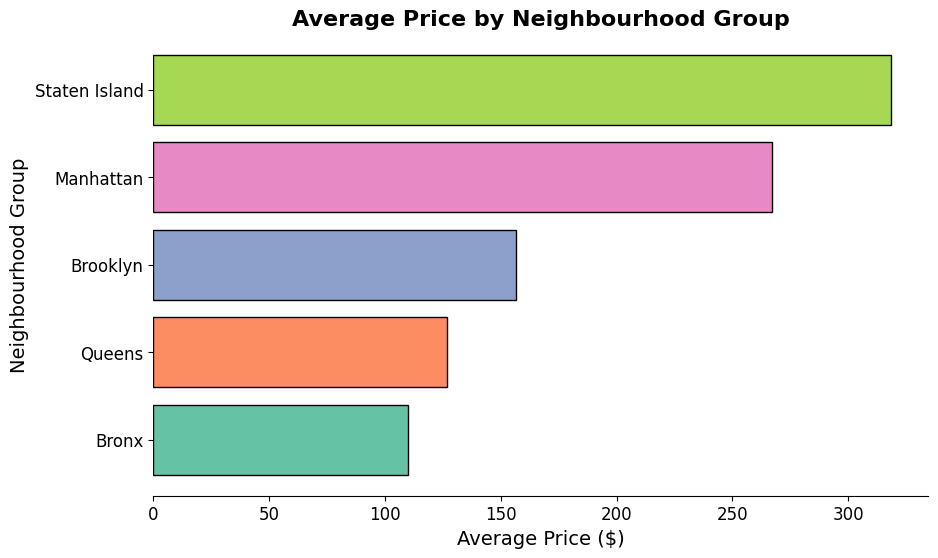

In [87]:
# select color for bar's
colors = sb.color_palette("Set2")
# calculating mean of price for every neighbourhood group
avg_price_neighborhood_group = airbnb_df.groupby(["neighbourhood_group"])["price"].mean()
# sorting values to get a better view
df =pd.DataFrame(avg_price_neighborhood_group).reset_index()
avg_price_neighborhood_group = df.sort_values(by="price", ascending=True)

plt.figure(figsize=(10, 6))
# ploting horizontal bar chart
bars = plt.barh(avg_price_neighborhood_group["neighbourhood_group"], avg_price_neighborhood_group["price"], color=colors, edgecolor='black')

# formatting
plt.title("Average Price by Neighbourhood Group", fontsize=16, fontweight='bold')
plt.xlabel("Average Price ($)", fontsize=14)
plt.ylabel("Neighbourhood Group", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sb.despine(left=True)  # Removing left spine for a cleaner look

plt.show()

# Q. Who are top 5 hosts who own most property?

/tmp/ipykernel_28228/2818510126.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=host_propertys_df,x="host_name",y="calculated_host_listings_count", palette=colors)
/tmp/ipykernel_28228/2818510126.py:9: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sb.barplot(data=host_propertys_df,x="host_name",y="calculated_host_listings_count", palette=colors)


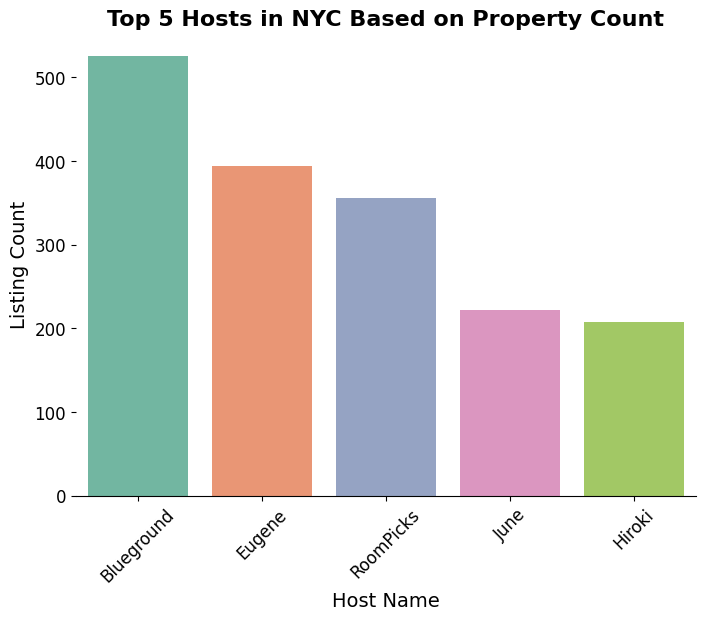

In [88]:

# top 5 host's who own's most property
host_propertys = airbnb_df.groupby(["host_id","host_name"])["calculated_host_listings_count"].mean()  # we chose mean to get sum of all listing by one persone because the count is repeated for every property
host_propertys_df = pd.DataFrame(host_propertys).reset_index()   # creating data frame
host_propertys_df=host_propertys_df.sort_values(by = "calculated_host_listings_count",ascending=False).head(5) # sorting values
colors = sb.color_palette("Set2")

plt.figure(figsize = (8,6))
# creating a simple bar plot
sb.barplot(data=host_propertys_df,x="host_name",y="calculated_host_listings_count", palette=colors)

# formatting
plt.title("Top 5 Hosts in NYC Based on Property Count", fontsize=16, fontweight='bold')
plt.xlabel("Host Name", fontsize=14)
plt.ylabel("Listing Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
sb.despine(left=True)


plt.show()
     

# Q. Who are most expensive hosts?

In [89]:

# most expensive hosts in nyc
# you can change the count of top most expencive hosts
top = 5
# calculating the expencive hosts by the maximum price of there property
expensive_hosts = airbnb_df.groupby(["host_id", "host_name"])["price"].max().reset_index()
# getting in descending order for top most values
top_expensive_hosts = expensive_hosts.sort_values(by = "price", ascending= False).head(top)
# getting totall reviews by that hosts
sum_of_reviews =  airbnb_df.groupby(["host_id", "host_name"])["number_of_reviews"].sum().reset_index()
# joining both tables for further visualization
joined_df = pd.merge(left= top_expensive_hosts, right= sum_of_reviews, how="left" )
joined_df # view in tabular format

,host_id,host_name,price,number_of_reviews
0,51913277,Andrada,85170,297
1,18586628,Udeaku,85100,25
2,92493393,Lois,65115,182
3,1261480,Doungrat (Diane),20500,80
4,34906299,Lilian,19750,0


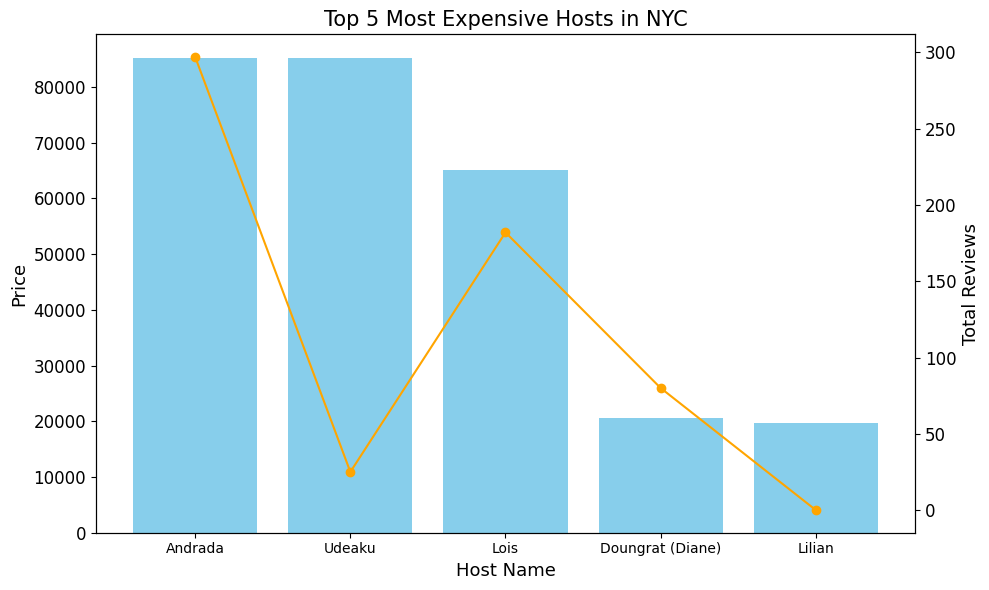

In [90]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for prices (primary y-axis)
ax1.bar(joined_df['host_name'], joined_df['price'], color='skyblue', label='Price')
ax1.set_xlabel('Host Name', size = 13)
ax1.set_ylabel('Price', color='k', size = 13)
ax1.tick_params(axis='y', labelcolor='k',labelsize = 12)

# Creating a line chart for number of reviews (secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(joined_df['host_name'], joined_df['number_of_reviews'], marker='o', color='orange', label='Total Reviews')
ax2.set_ylabel('Total Reviews', color='k', size = 13)
ax2.tick_params(axis='y', labelcolor='k', labelsize = 12)

plt.title('Top 5 Most Expensive Hosts in NYC', size = 15)
fig.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# DATA MODELLING AND DATA PREDICTION 

# Model= Price Prediction based on name

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
mydata=pd.read_csv('airbnb_NYC_2023.csv')
mydata.head()

/tmp/ipykernel_170043/1448110165.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  mydata=pd.read_csv('23.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


### Let's see if we can classify a listing as cheap or expensive just based on the name

In [4]:
mydata['name'].isnull().sum()

12


### There are 12 names fields as NaN.Let's replace them with empty string.


In [5]:
mydata['name'].fillna('', inplace=True)
mydata['name'].isnull().sum()


0


### Now let's remove punctuation, digits and special characters.


In [6]:
import re
def remove_punctuation_digits_specialchar(line):
    return re.sub('[^A-Za-z]+', ' ', line).lower()

mydata['clean_name'] = mydata['name'].apply(remove_punctuation_digits_specialchar)
# Let's compare raw and cleaned texts.
mydata[['name', 'clean_name']].head()

,name,clean_name
0,Skylit Midtown Castle,skylit midtown castle
1,BlissArtsSpace!,blissartsspace
2,Cozy Clean Guest Room - Family Apt,cozy clean guest room family apt
3,Large Furnished Room Near B'way,large furnished room near b way
4,"Large Sunny Brooklyn Duplex, Patio + Garden",large sunny brooklyn duplex patio garden


In [9]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [18]:
!pip install regex

Defaulting to user installation because normal site-packages is not writeable


In [21]:
!pip install ngram

Defaulting to user installation because normal site-packages is not writeable


In [22]:
!pip install stopwords

Defaulting to user installation because normal site-packages is not writeable


In [24]:
!pip install corpus

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 2.0 MB/s eta 0:00:00 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for corpus: filename=Corpus-0.4.2-py3-none-any.whl size=88798 sha256=d3c088a422b28e91af197ce6231449e5d7afda9fec51e33926f10957690b32c5
  Stored in directory: /home/kalikali/.cache/pip/wheels/70/b6/bf/fa4851cb0902aafa9812d0b1c9aae6c7ae55f87827e23683bc
Successfully built corpus


In [29]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:01:01


In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/kalikali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kalikali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Now let's remove stop words
 

In [17]:
import nltk
from nltk.util import ngrams

from nltk.corpus import stopwords


def tokenize_no_stopwords(line):
    tokens = nltk.tokenize.word_tokenize(line)
    tokens_no_stop = [w for w in tokens if w not in stopwords.words('english')]
    return " ".join(tokens_no_stop)
mydata['final_name'] = mydata['clean_name'].apply(tokenize_no_stopwords)
mydata[['clean_name', 'final_name']].head()

,clean_name,final_name
0,skylit midtown castle,skylit midtown castle
1,blissartsspace,blissartsspace
2,cozy clean guest room family apt,cozy clean guest room family apt
3,large furnished room near b way,large furnished room near b way
4,large sunny brooklyn duplex patio garden,large sunny brooklyn duplex patio garden


### Train vs Test 
 Now lets define a price above 300 as expensive and below 300 as cheap.
 We divide dataset into 80% training and 20% as test dataset
 We use TF-IDF metric which we have learnt in class to represent the weights of each feature
 LGBM classifier is used which is similar to decision trees.


In [21]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, classification_report
from imblearn.over_sampling import RandomOverSampler

# Function to classify prices as cheap or expensive
def classify_as_cheap_or_expensive(line):
    return 1 if line > 300 else 0

# Add target column based on price
mydata['target'] = mydata['price'].apply(classify_as_cheap_or_expensive)

# Split data into training and test sets
train, test = train_test_split(mydata, test_size=0.2, random_state=315, stratify=mydata['target'])
X_train, y_train = train['final_name'], train['target']
X_test, y_test = test['final_name'], test['target']

# Vectorize the text data
vect = TfidfVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

# Handle class imbalance using RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=1)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Train the LightGBM Classifier
lr = LGBMClassifier(random_state=315)
lr.fit(X_train_ros, y_train_ros)

# Make predictions on the test set
preds = lr.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, preds))
print("Accuracy: {0:.3f}".format(accuracy_score(y_test, preds)))
print("Recall: {0:.3f}".format(recall_score(y_test, preds)))


[LightGBM] [Info] Number of positive: 30290, number of negative: 30290
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.141702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47210
[LightGBM] [Info] Number of data points in the train set: 60580, number of used features: 992
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7573
           1       0.34      0.71      0.46      1014

    accuracy                           0.80      8587
   macro avg       0.65      0.76      0.67      8587
weighted avg       0.88      0.80      0.83      8587

Accuracy: 0.803
Recall: 0.705



### The scores aren't perfect but taking into account that the predicting model is built solely on textual descriptions of a listing, it seems like the words in Airbnb titles actually do matter!


In [19]:
mydata.drop(columns=['target', 'clean_name'], axis=1, inplace=True)

In [20]:
mydata.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,final_name
0,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,0.30,3,314,1,NaN,skylit midtown castle
1,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,0.30,2,365,0,NaN,blissartsspace
2,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,0.72,1,0,0,NaN,cozy clean guest room family apt
3,5178,Large Furnished Room Near B'way,8967,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,3.41,1,106,52,NaN,large furnished room near b way
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,0.03,1,181,1,NaN,large sunny brooklyn duplex patio garden



### Now for using other models, let us first convert the categorical features into numeric by using encoding


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()                                            # Fit label encoder
le.fit(mydata['neighbourhood_group'])
mydata['neighbourhood_group']=le.transform(mydata['neighbourhood_group'])    # Transform labels to normalized encoding.

le = LabelEncoder()
le.fit(mydata['neighbourhood'])
mydata['neighbourhood']=le.transform(mydata['neighbourhood'])

le =LabelEncoder()
le.fit(mydata['room_type'])
mydata['room_type']=le.transform(mydata['room_type'])


mydata.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,final_name,target
0,2595,Skylit Midtown Castle,2845,2,129,40.75356,-73.98559,0,150,30,49,0.30,3,314,1,NaN,skylit midtown castle,0
1,5121,BlissArtsSpace!,7356,1,12,40.68535,-73.95512,2,60,30,50,0.30,2,365,0,NaN,blissartsspace,0
2,5203,Cozy Clean Guest Room - Family Apt,7490,2,204,40.80380,-73.96751,2,75,2,118,0.72,1,0,0,NaN,cozy clean guest room family apt,0
3,5178,Large Furnished Room Near B'way,8967,2,129,40.76457,-73.98317,2,68,2,575,3.41,1,106,52,NaN,large furnished room near b way,0
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,1,192,40.66265,-73.99454,0,275,60,3,0.03,1,181,1,NaN,large sunny brooklyn duplex patio garden,0



# Linear Regression Model
### Prices are not normally distributed as well as there is alot of noise.Hence instead of considering y, we consider log(y)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
lm = LinearRegression()
mydata=mydata[mydata.price>0]
mydata=mydata[mydata.availability_365>0]

X = mydata[['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
#Prices are not normally distributed as well as there is alot of noise. Logarithmic conversion of data with huge variance can be normalised by logarithmic algorithm.
y= np.log10(mydata['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)
from sklearn.metrics import mean_absolute_error
y_predicts = lm.predict(X_test)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(metrics.mean_squared_error(y_test, y_predicts)),
        r2_score(y_test,y_predicts) * 100,
        mean_absolute_error(y_test,y_predicts)
        ))


        Mean Squared Error: 0.28094827316807824
        R2 Score: 31.253153396597156
        Mean Absolute Error: 0.20963364962254746
     


# Decision Tree model


In [24]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create and train the DecisionTreeRegressor
Reg_tree = DecisionTreeRegressor(criterion='squared_error', max_depth=3, random_state=0)
Reg_tree.fit(X_train, y_train)

# Make predictions
y_predicts = Reg_tree.predict(X_test)

# Calculate evaluation metrics
mape = np.mean(np.abs((y_test - y_predicts) / y_test))  # Mean Absolute Percentage Error
mse = mean_squared_error(y_test, y_predicts)
r2 = r2_score(y_test, y_predicts)
mae = mean_absolute_error(y_test, y_predicts)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(mse),
        r2 * 100,
        mae
        ))


Mean Absolute Percentage Error (MAPE): 0.08885721933251019

        Mean Squared Error: 0.257286905884333
        R2 Score: 42.34520712664484
        Mean Absolute Error: 0.19290572865754665
     


#  Ridge Model


In [25]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Ridge regression model
ridge_model = linear_model.Ridge(alpha=0.01)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
y_predicts = ridge_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_predicts)
r2 = r2_score(y_test, y_predicts)
mae = mean_absolute_error(y_test, y_predicts)

print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(mse),
        r2 * 100,
        mae
        ))



        Mean Squared Error: 0.28094827195077327
        R2 Score: 31.253153992335857
        Mean Absolute Error: 0.20963365134468614
     


# Lasso Model


In [26]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Create a pipeline that first normalizes the data and then applies the Lasso model
Lasso_model = make_pipeline(StandardScaler(), linear_model.Lasso(alpha=0.001))

# Fit the model
Lasso_model.fit(X_train, y_train)

# Predict
y_predicts = Lasso_model.predict(X_test)

# Print the metrics
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
     """.format(
        np.sqrt(mean_squared_error(y_test, y_predicts)),
        r2_score(y_test, y_predicts) * 100,
        mean_absolute_error(y_test, y_predicts)
        ))



        Mean Squared Error: 0.2809187472423386
        R2 Score: 31.267602374014213
        Mean Absolute Error: 0.2096917094698634
     


### We can see that Decision Tree model has the highest R^2 value and least error. Hence it is the best model.


In [27]:
mydata.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,final_name,target
0,2595,Skylit Midtown Castle,2845,2,129,40.75356,-73.98559,0,150,30,49,0.30,3,314,1,NaN,skylit midtown castle,0
1,5121,BlissArtsSpace!,7356,1,12,40.68535,-73.95512,2,60,30,50,0.30,2,365,0,NaN,blissartsspace,0
3,5178,Large Furnished Room Near B'way,8967,2,129,40.76457,-73.98317,2,68,2,575,3.41,1,106,52,NaN,large furnished room near b way,0
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,1,192,40.66265,-73.99454,0,275,60,3,0.03,1,181,1,NaN,large sunny brooklyn duplex patio garden,0
5,29628,"Comfortable, Sunny Room",127608,1,41,40.68292,-73.96381,2,93,3,350,2.25,1,145,48,NaN,comfortable sunny room,0



# Recommender System
### We have implemented a recommender system which suggests an airbnb listing using the keywords the user has provided. It returns the most relevant airbnb listing.


In [28]:
from fuzzywuzzy import process

def airbnb_finder(title):
    all_titles = mydata['final_name'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]
title = airbnb_finder('village')
title

/home/kalikali/.local/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


'sunny clean bdrm w village'